<a href="https://colab.research.google.com/github/biswajitburagohain/neural_net-practice/blob/master/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from tensorflow.keras import Model
from tensorflow.keras import layers

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-05-28 18:20:27--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 2a00:1450:400c:c0a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  86.9MB/s    in 1.0s    

2020-05-28 18:20:28 (86.9 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [0]:
weights = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model = InceptionV3(input_shape = (150, 150,3),
                         include_top = False,
                         weights = None)

base_model.load_weights(weights)

In [0]:
for i in base_model.layers:
  i.trainable = False

In [0]:
last_layer = base_model.get_layer('mixed8')
last_output = last_layer.output

In [0]:
x = layers.Flatten()(last_output)

In [0]:
x = layers.Dense(1024, activation='relu')(x)

In [0]:
x = layers.Dropout(rate = 0.2)(x)      #adding dropouts

In [0]:
x = layers.Dense(1, activation='sigmoid')(x)

In [0]:
model = Model(base_model.input, x)

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [13]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

--2020-05-28 18:21:38--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 2a00:1450:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  96.4MB/s    in 0.7s    

2020-05-28 18:21:38 (96.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   height_shift_range = 0.2,
                                   width_shift_range = 0.2,
                                   rotation_range = 40,
                                   shear_range = 0.3,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest'
                                   )

validation_datagen = ImageDataGenerator(rescale = 1./255)


In [16]:
train_generator = train_datagen.flow_from_directory(target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    directory = train_dir)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                             target_size = (150, 150),
                                                             batch_size = 20,
                                                             class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit(train_generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    verbose = 1)

Epoch 1/20
100/100 [==============================] - 23s 230ms/step - loss: 0.4002 - accuracy: 0.8505 - val_loss: 0.0914 - val_accuracy: 0.9590
Epoch 2/20
100/100 [==============================] - 21s 210ms/step - loss: 0.2149 - accuracy: 0.9135 - val_loss: 0.1003 - val_accuracy: 0.9600
Epoch 3/20
100/100 [==============================] - 22s 217ms/step - loss: 0.2008 - accuracy: 0.9205 - val_loss: 0.0856 - val_accuracy: 0.9620
Epoch 4/20
100/100 [==============================] - 21s 210ms/step - loss: 0.1551 - accuracy: 0.9355 - val_loss: 0.0930 - val_accuracy: 0.9590
Epoch 5/20
100/100 [==============================] - 22s 216ms/step - loss: 0.1680 - accuracy: 0.9390 - val_loss: 0.1169 - val_accuracy: 0.9500
Epoch 6/20
100/100 [==============================] - 21s 211ms/step - loss: 0.1442 - accuracy: 0.9445 - val_loss: 0.1331 - val_accuracy: 0.9560
Epoch 7/20
100/100 [==============================] - 22s 216ms/step - loss: 0.1560 - accuracy: 0.9395 - val_loss: 0.1483 - val_ac

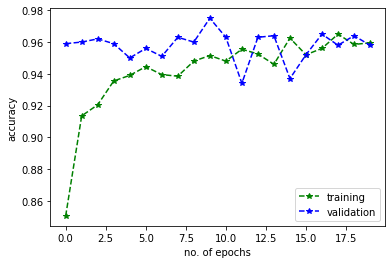

In [23]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoc = range(len(acc))

plt.plot(epoc, acc, 'g*--', label='training')
plt.plot(epoc, val_acc, 'b*--', label='validation')
plt.xlabel('no. of epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()